# Excavator use-case 9: Times and dates

Solver type:
	-> Standard SAT/SMT solver
	Objectives:
	MakeSpan(<class 'processscheduler.objective.MinimizeObjective'>)
0 assertion(s):

	MinimizeObjective_5c9683ba(<class 'processscheduler.objective.MinimizeObjective'>)
0 assertion(s):

	EquivalentObjective(<class 'processscheduler.objective.MinimizeObjective'>)
0 assertion(s):

Incremental optimizer:
	Found value: 50 elapsed time:0.009s
	Checking better value < 50
	Found value: 49 elapsed time:0.019s
	Checking better value < 49
	Found value: 48 elapsed time:0.019s
	Checking better value < 48
	Found value: 47 elapsed time:0.019s
	Checking better value < 47
	Found value: 46 elapsed time:0.020s
	Checking better value < 46
	Found value: 45 elapsed time:0.020s
	Checking better value < 45
	Found value: 44 elapsed time:0.020s
	Checking better value < 44
	Found value: 43 elapsed time:0.020s
	Checking better value < 43
	Found value: 42 elapsed time:0.021s
	Checking better value < 42
	Can't find a better solution for problem ExcavatorProblemRe

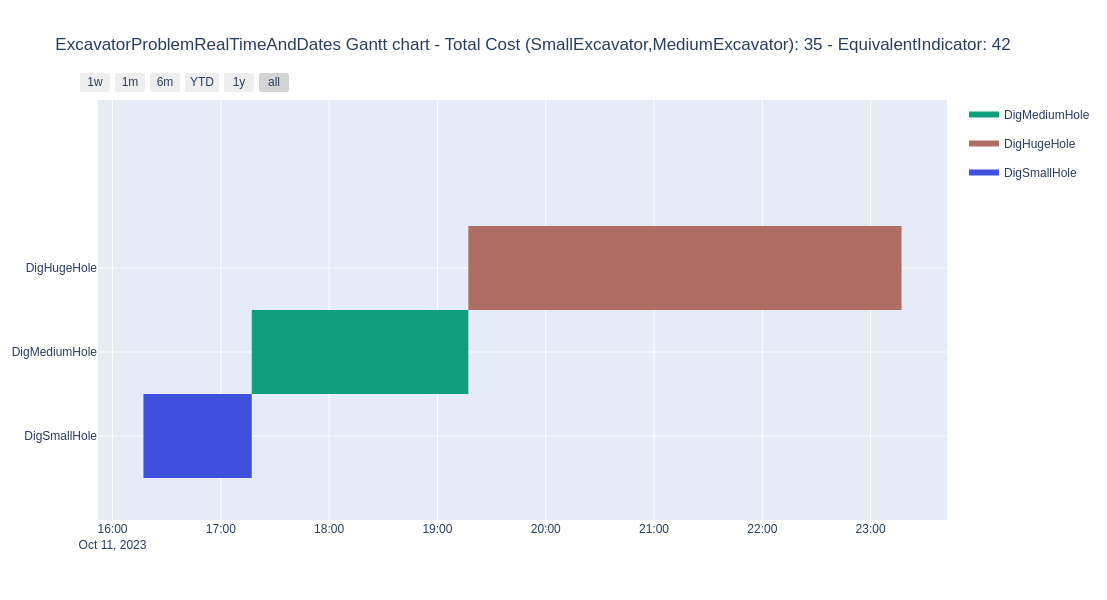

In [5]:
import processscheduler as ps
import processscheduler as ps
from datetime import datetime, timedelta

problem = ps.SchedulingProblem(
    "ExcavatorProblemRealTimeAndDates",
    start_time=datetime.now(),
    delta_time=timedelta(hours=1),
)

# three tasks
dig_small_hole = ps.VariableDurationTask("DigSmallHole", work_amount=3)
dig_medium_hole = ps.VariableDurationTask("DigMediumHole", work_amount=7)
dig_huge_hole = ps.VariableDurationTask("DigHugeHole", work_amount=15)

# two workers
small_exc = ps.Worker(
    "SmallExcavator", productivity=4, cost=ps.ConstantCostPerPeriod(5)
)
medium_ex = ps.Worker(
    "MediumExcavator", productivity=6, cost=ps.ConstantCostPerPeriod(10)
)

dig_small_hole.add_required_resource(
    ps.SelectWorkers([small_exc, medium_ex], 1, kind="min")
)
dig_medium_hole.add_required_resource(
    ps.SelectWorkers([small_exc, medium_ex], 1, kind="min")
)
dig_huge_hole.add_required_resource(
    ps.SelectWorkers([small_exc, medium_ex], 1, kind="min")
)

problem.add_objective_makespan()
problem.add_objective_resource_cost([small_exc, medium_ex])

solver = ps.SchedulingSolver(problem, optimize_priority="pareto")
solution = solver.solve()
solution.render_gantt_plotly(render_mode="Task")

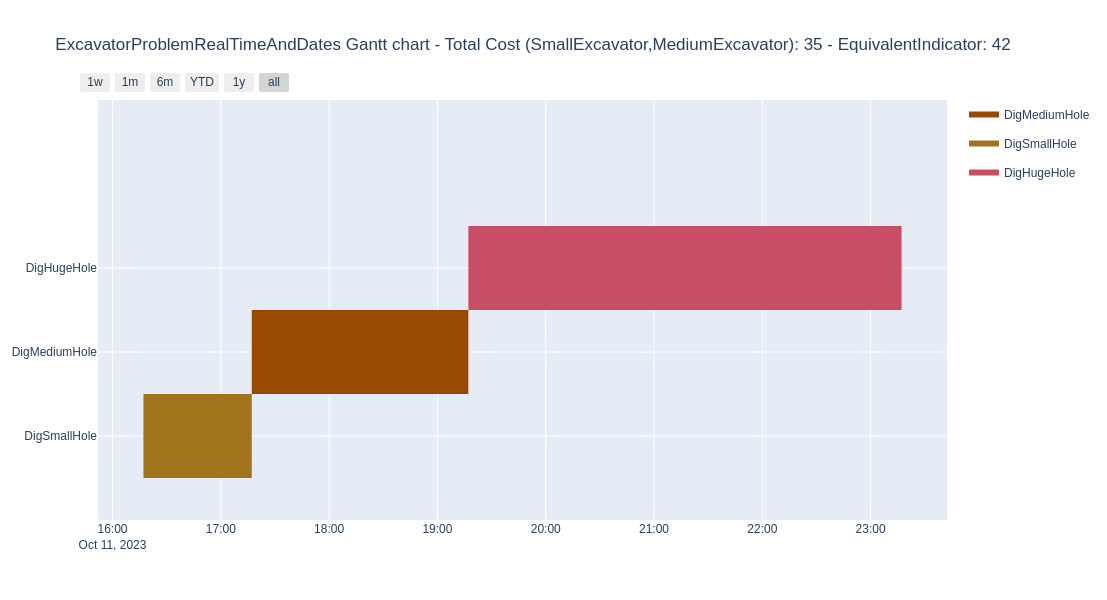

In [6]:
solution.render_gantt_plotly(render_mode="Task")